# Setup

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('aluno05.csv', names=['pressure', 'ddp','pressure1'], header=None)

# 1

Para encontrar a equação de calibração entre a pressão medida em pascals e a saída do transdutor em volts, podemos usar a regressão linear. O seguinte código em Python usa a biblioteca Pandas para ler os dados de um arquivo CSV e a biblioteca Scikit-learn para executar a regressão linear:

In [37]:
# Separa as colunas em arrays NumPy
pressure = df['pressure'].values.reshape(-1, 1)
ddp = df['ddp'].values

# Executa a regressão linear
regressor = LinearRegression()
regressor.fit(pressure, ddp)

# Imprime a equação de calibração
print('y =', regressor.coef_[0], '* x +', regressor.intercept_)

y = 0.00010499427124583003 * x + 0.045582995736035414


Text(0, 0.5, 'ddp')

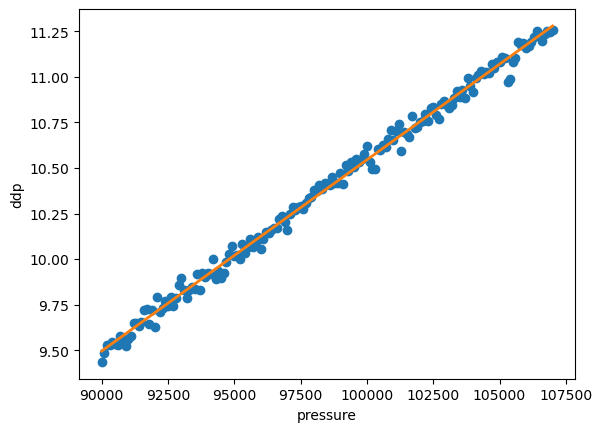

In [38]:
#plot data and fit
plt.plot(pressure, ddp, 'o')
plt.plot(pressure, regressor.predict(pressure), linewidth=2)
plt.xlabel('pressure')
plt.ylabel('ddp')

# 2

Para calcular o erro sistemático, podemos calcular a média das diferenças entre as medições e a medida de referência. Se houver um erro sistemático presente, a média das diferenças não será igual a zero.

In [41]:
# erro sistematico
erro_sist = np.mean(ddp - regressor.predict(pressure))
print("Erro sistemático:", erro_sist)

Erro sistemático: -7.791038769299344e-16


Para calcular o erro aleatório, podemos calcular o desvio padrão das diferenças. Se houver um erro aleatório presente, o desvio padrão das diferenças será maior do que zero.

In [42]:
# Cálculo do erro aleatório
erro_aleat = np.std(ddp - regressor.predict(pressure))
print("Erro aleatório:", erro_aleat)

Erro aleatório: 0.03657307220292296


# 3

In [52]:
pressure = pressure.squeeze()

Usamos as equações abaixo como as funções de ajuste. y = a * np.exp(-b * x) + c

Mas poderia ser:

y = ax**2 + bx + c

y = ax**3 + bx + c

y = ax**3 + bx**2 + c

y = aexp(bx) + c

Teste cada uma delas para ver qual vai dar o melho ajuste

In [70]:

# Define the equations to fit


def func1(x, a, b, c):
    return a * np.exp(-b * x) + c

def func2(x, a, b, c):
    return a * x**2 + b * x + c

def func3(x, a, b, c):
    return a * x**3 + b * x + c

def func4(x, a, b, c):
    return a * x**3 + b * x**2 + c



# Fit each equation to the data using curve_fit
popt1, pcov1 = curve_fit(func1, pressure, ddp)
popt2, pcov2 = curve_fit(func2, pressure, ddp)
popt3, pcov3 = curve_fit(func3, pressure, ddp)
popt4, pcov4 = curve_fit(func4, pressure, ddp)

# Calculate the R-squared values for each fit
residuals1 = ddp - func1(pressure, *popt1)
ss_res1 = np.sum(residuals1**2)
ss_tot1 = np.sum((ddp - np.mean(ddp))**2)
r_squared1 = 1 - (ss_res1 / ss_tot1)

residuals2 = ddp - func2(pressure, *popt2)
ss_res2 = np.sum(residuals2**2)
ss_tot2 = np.sum((ddp - np.mean(ddp))**2)
r_squared2 = 1 - (ss_res2 / ss_tot2)

residuals3 = ddp - func3(pressure, *popt3)
ss_res3 = np.sum(residuals3**2)
ss_tot3 = np.sum((ddp - np.mean(ddp))**2)
r_squared3 = 1 - (ss_res3 / ss_tot3)

residuals4 = ddp - func4(pressure, *popt4)
ss_res4 = np.sum(residuals4**2)
ss_tot4 = np.sum((ddp - np.mean(ddp))**2)
r_squared4 = 1 - (ss_res4 / ss_tot4)



# Print the best fit equation and its R-squared value
r_squared_values = [ r_squared1, r_squared2, r_squared3, r_squared4]
best_fit_index = np.argmax(r_squared_values)

print('the best function is the number', best_fit_index+1)

the best function is the number 4


c:\Users\luisg\anaconda3\envs\geo_env\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Criar arrays NumPy para as colunas de pressão e ddp:

Resultado da interpolação é colocado em:

In [71]:
def func(x, a, b, c):
    return a*x**2 + b*x + c


In [72]:
popt, pcov = curve_fit(func, pressure, ddp)


Resultado da covariancia

In [73]:
popt

array([-2.75918822e-10,  1.59350279e-04, -2.62472718e+00])

In [74]:
print(pcov)

[[ 1.63107427e-20 -3.21321635e-15  1.57853470e-10]
 [-3.21321635e-15  6.33321546e-10 -3.11284490e-05]
 [ 1.57853470e-10 -3.11284490e-05  1.53077979e+00]]


Resultado do ajuste

In [75]:
print(popt)

[-2.75918822e-10  1.59350279e-04 -2.62472718e+00]


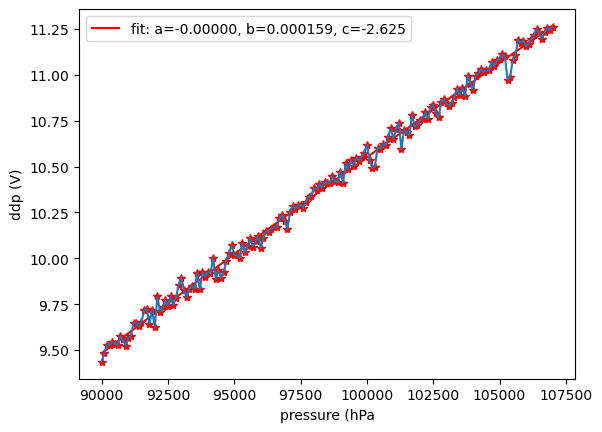

In [79]:
plt.plot(pressure, ddp,'r*')
plt.plot(pressure, func(pressure, *popt), 'r-',
         label='fit: a=%7.5f, b=%8.6f, c=%5.3f' % tuple(popt))
plt.plot(pressure, ddp)
plt.xlabel('pressure (hPa')
plt.ylabel('ddp (V)')
plt.legend()
plt.show()

Inverta agora a função para fazer a função de transferencia e use a mesma para calcular a pressão para os dados para os seguintes tensão (ddp) em V. 

In [77]:
voltagem = np.random.uniform(10, 12, 100)


[10.73692998 10.88349669 10.95699674 11.60085502 10.10259816 10.69345774
 10.43178082 10.38795285 11.58271888 11.70313178 11.85401142 10.2312831
 11.26208991 11.86462645 10.848716   11.07789964 11.64957865 11.77430061
 11.12219672 10.71097273 10.10852012 10.36909903 11.78086917 10.42113906
 11.82186762 11.56161561 11.19493323 10.34762478 10.40597014 10.83546567
 10.28057919 10.05395731 10.13039107 10.27678618 11.18780192 10.93224155
 10.32423015 11.13687229 11.83112572 10.51916381 11.5269041  10.55324149
 11.64531725 10.09460094 10.02617445 11.0743935  10.29764103 11.33646276
 11.3578108  11.38785176 10.43779166 10.32225317 10.99661257 11.67507331
 10.37063082 10.86908151 10.94689199 10.32475619 11.63921589 10.93004798
 11.86068108 11.70626999 10.91061253 11.53664171 11.37829506 11.13850659
 11.36703624 10.911687   10.26509989 11.97194354 10.73977319 10.17827089
 10.77500188 10.98082624 10.8040286  11.67090991 11.06936888 10.59140039
 11.4036999  10.99900968 10.92576644 11.8563425  11.

In [80]:
f_inv = np.poly1d(np.polyfit(func(pressure, *popt), pressure, 2))


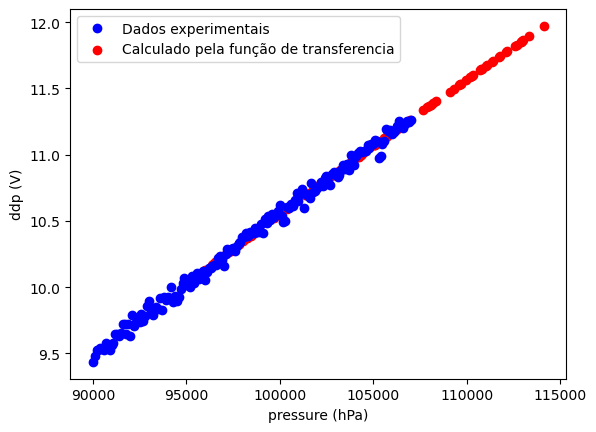

In [91]:
# calculate the pressure from voltage
pressure_fit = f_inv(voltagem)
#plot the data
plt.plot(pressure, ddp, 'o', label='Dados experimentais', c='b')

plt.scatter(pressure_fit, voltagem, label='Calculado pela função de transferencia', c='r')
plt.xlabel('pressure (hPa)')
plt.ylabel('ddp (V)')
plt.legend()